In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [12]:
df = pd.read_csv("/content/terrorism-deaths.csv")
df.head()

,Entity,Code,Year,Terrorism deaths
0,Afghanistan,AFG,1970,0
1,Afghanistan,AFG,1971,0
2,Afghanistan,AFG,1972,0
3,Afghanistan,AFG,1973,0
4,Afghanistan,AFG,1974,0


In [6]:
global_deaths_per_year = df.groupby('Year')["Terrorism deaths"].sum().reset_index()
print(global_deaths_per_year.head())

   Year  Terrorism deaths
0  1970               645
1  1971               666
2  1972              1921
3  1973              1418
4  1974              2117


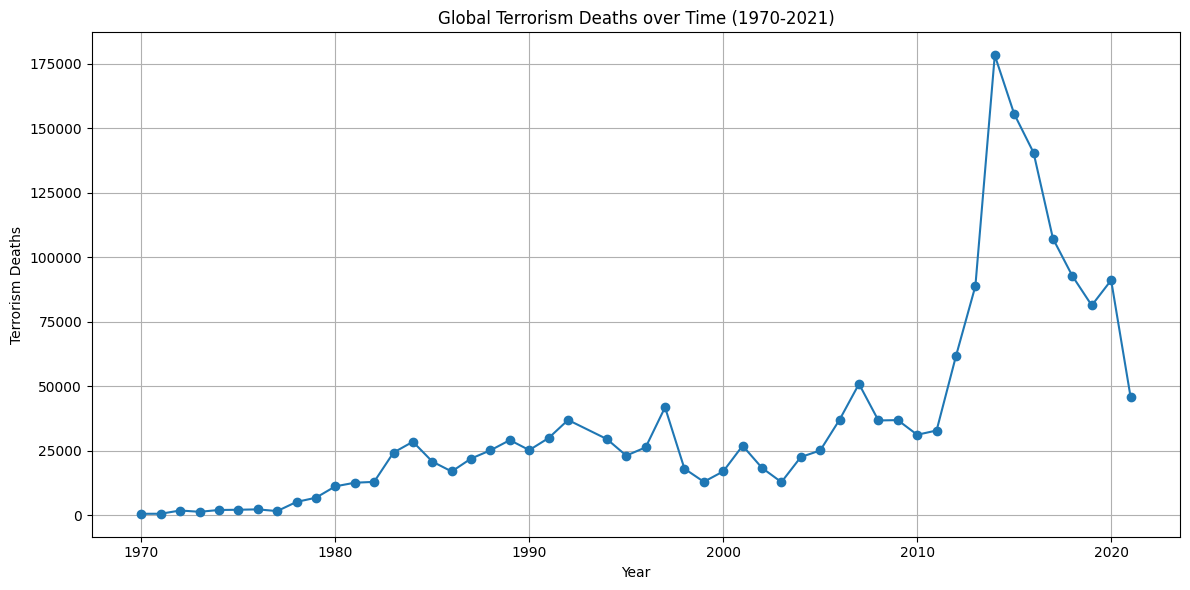

In [13]:
plt.figure(figsize=(12,6))
plt.plot(global_deaths_per_year['Year'],global_deaths_per_year['Terrorism deaths'],marker='o')
plt.title('Global Terrorism Deaths over Time (1970-2021)')
plt.xlabel('Year')
plt.ylabel('Terrorism Deaths')
plt.grid(True)
plt.tight_layout()
plt.show()

In [14]:
ts = global_deaths_per_year.set_index("Year")["Terrorism deaths"]
print(ts.head())

Year
1970     645
1971     666
1972    1921
1973    1418
1974    2117
Name: Terrorism deaths, dtype: int64


In [15]:
ts.index = pd.to_datetime(ts.index,format = "%Y")
print(ts.head())

Year
1970-01-01     645
1971-01-01     666
1972-01-01    1921
1973-01-01    1418
1974-01-01    2117
Name: Terrorism deaths, dtype: int64


In [16]:
decomposition = seasonal_decompose(ts,model = 'additive', period = 1)

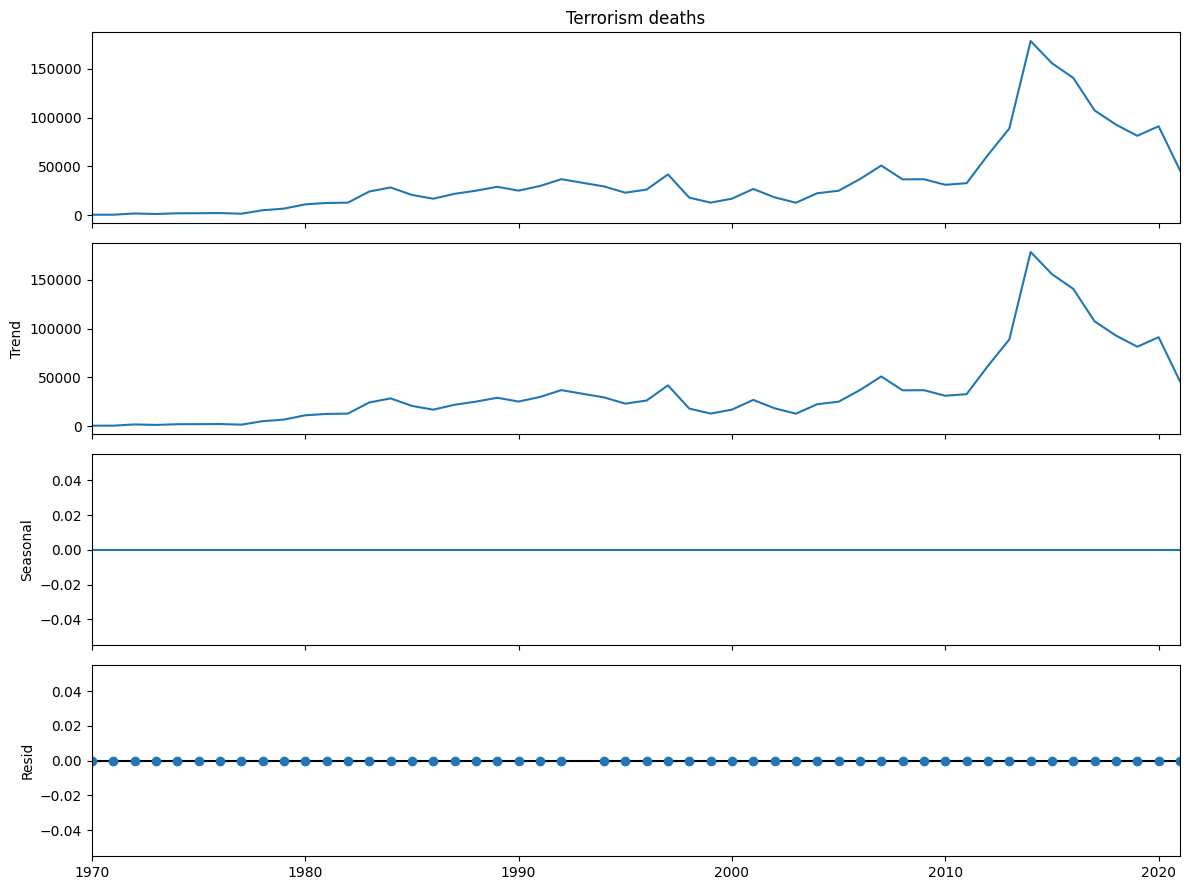

In [17]:
fig = decomposition.plot()
fig.set_size_inches(12,9)
plt.tight_layout()
plt.show()


----- Iraq -----


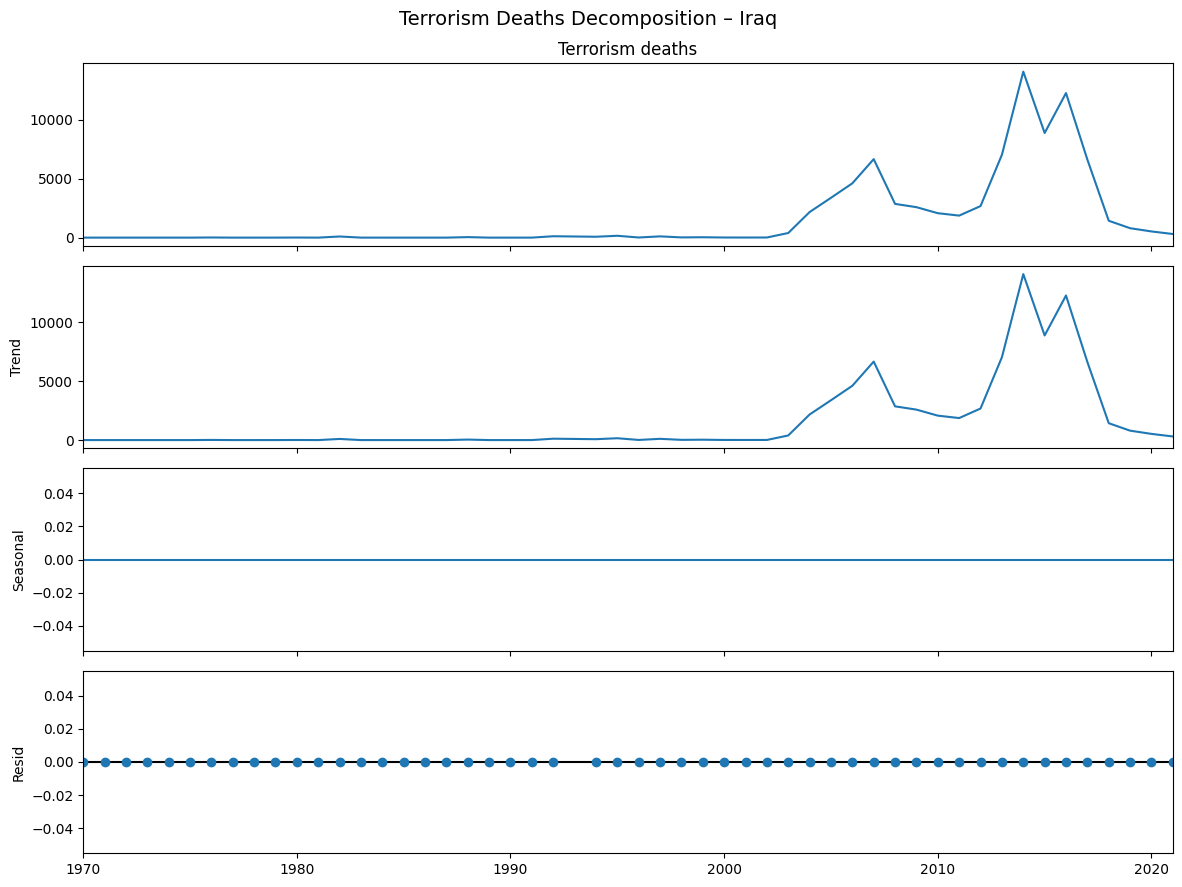


----- Afghanistan -----


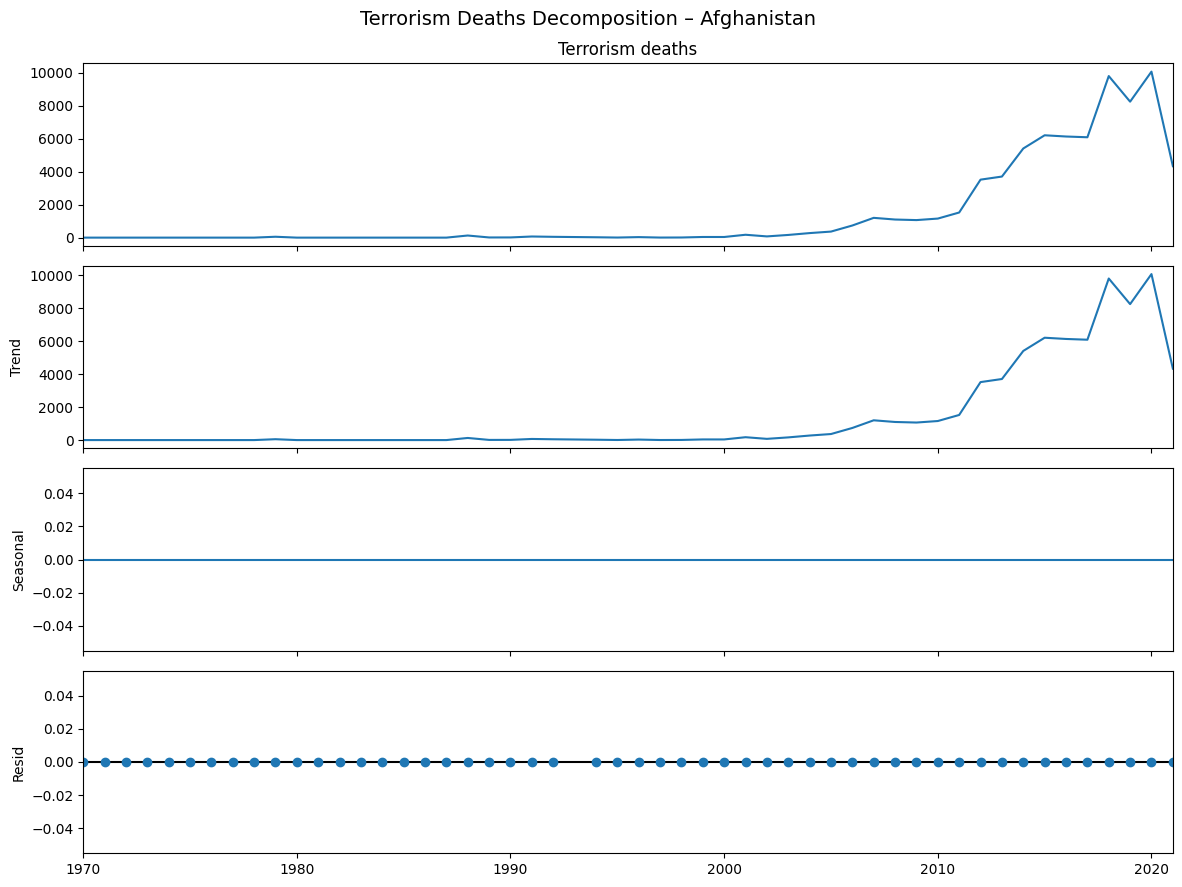


----- Nigeria -----


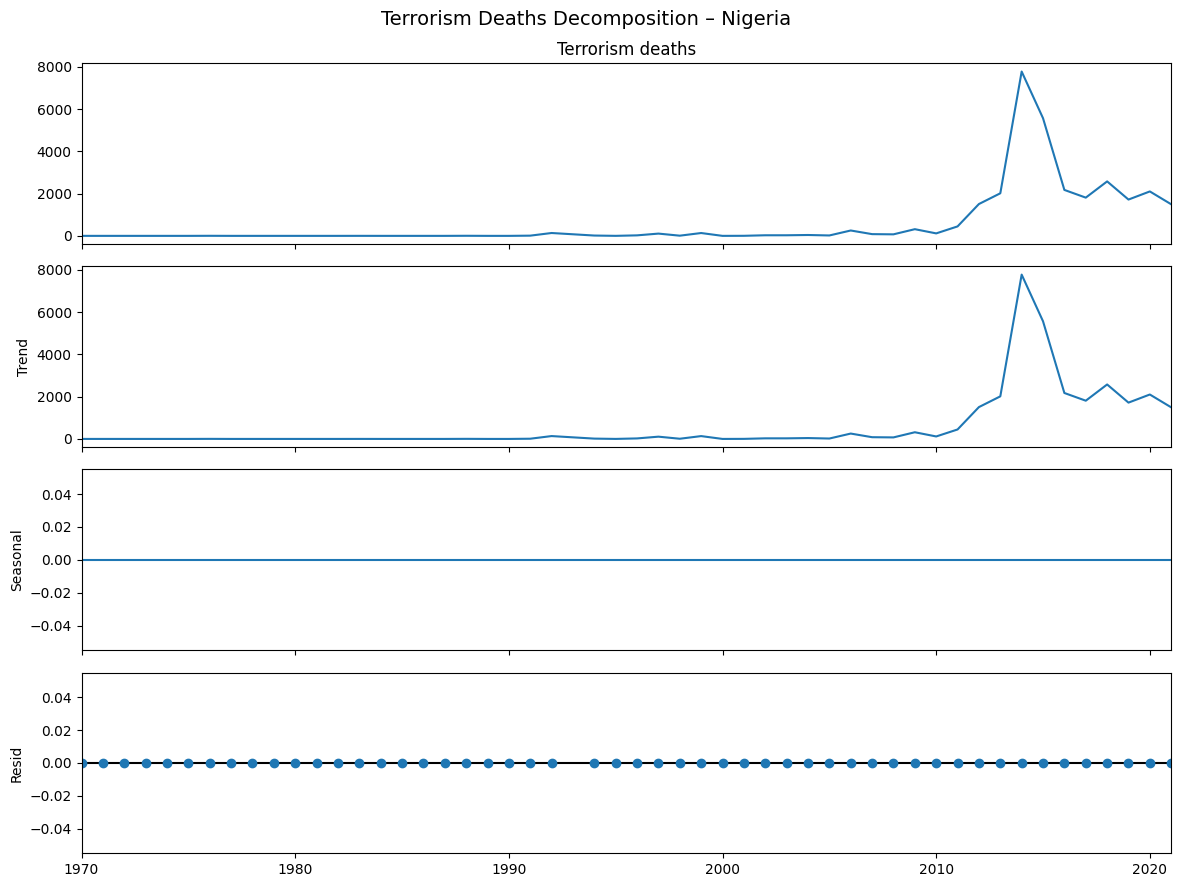


----- Pakistan -----


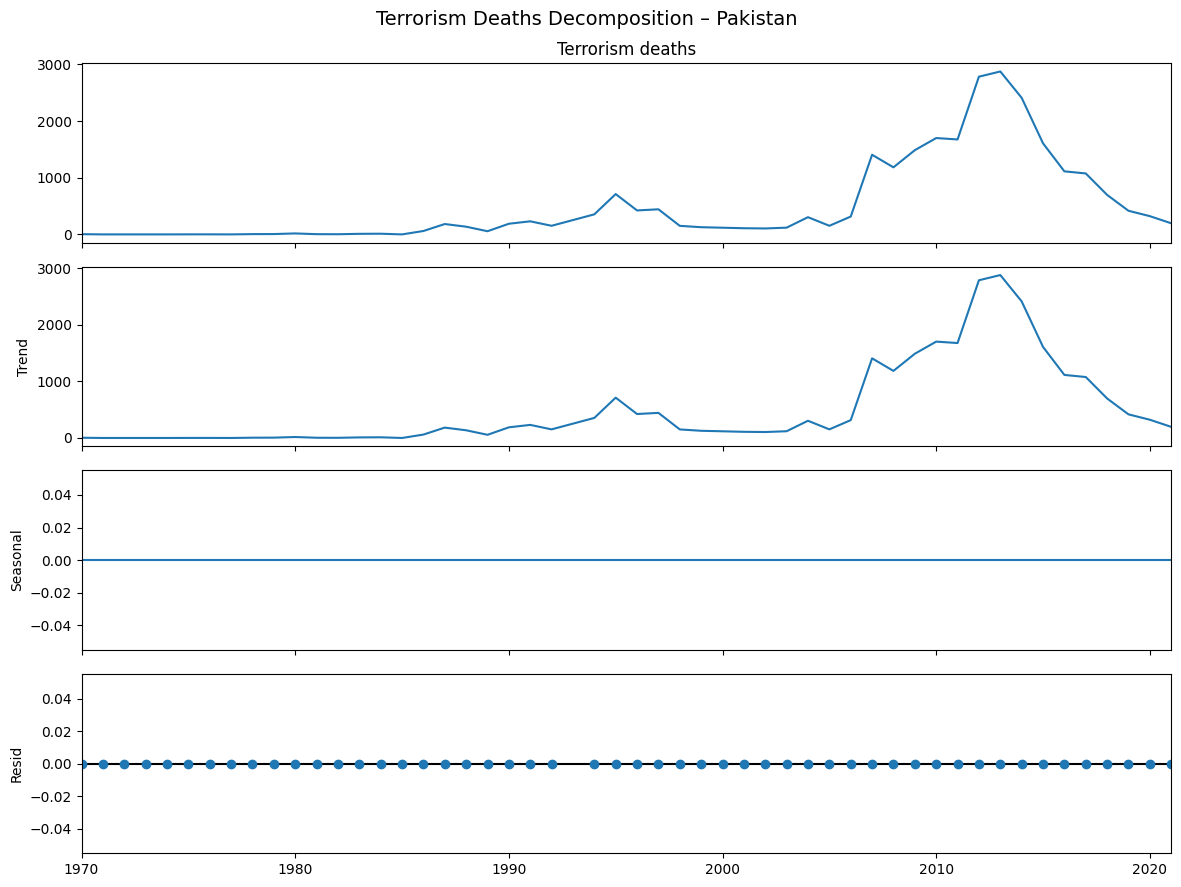


----- Syria -----


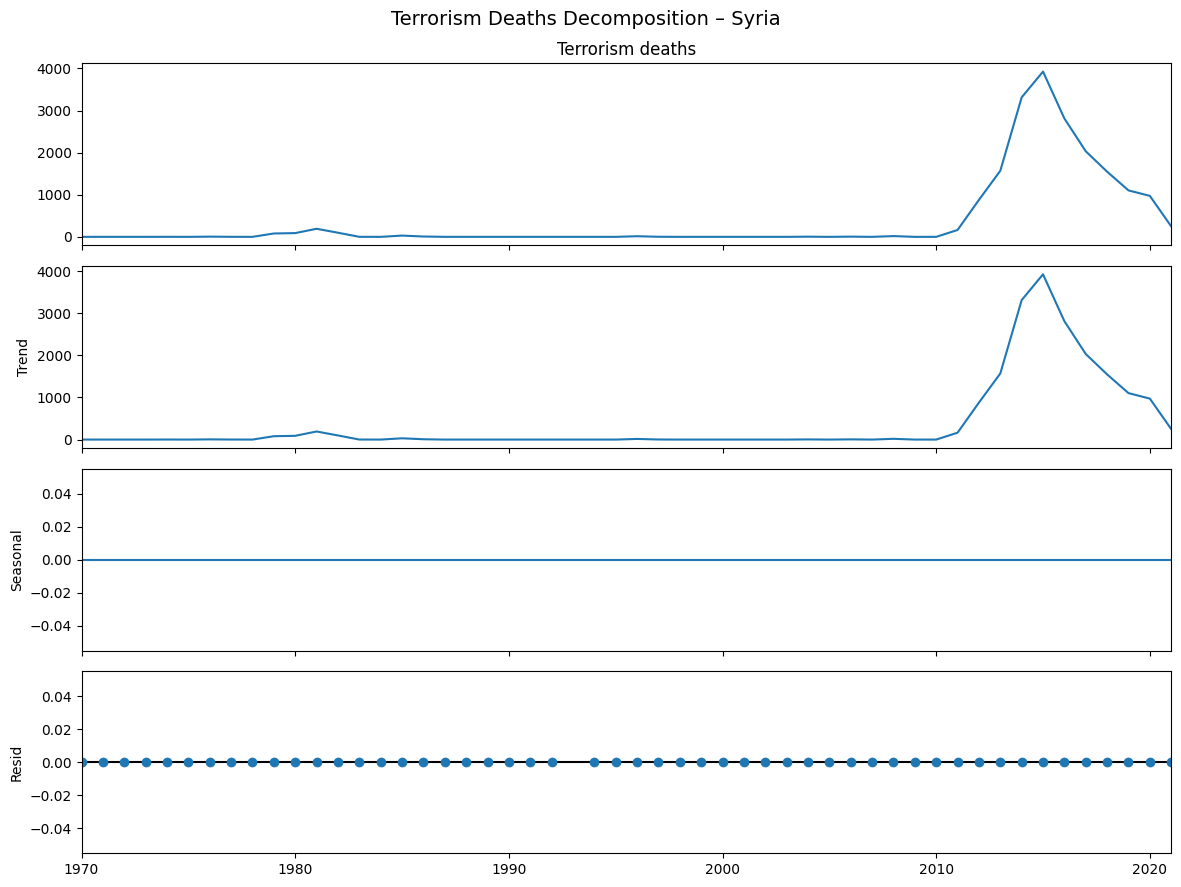

In [31]:
countries = ["Iraq", "Afghanistan", "Nigeria", "Pakistan", "Syria"]


for country in countries:
    print(f"\n----- {country} -----")


    country_df = df[df["Entity"] == country]


    if len(country_df) < 10 or country_df["Terrorism deaths"].sum() == 0:
        print(f"Not enough data for {country}. Skipping...\n")
        continue


    ts = country_df.set_index("Year")["Terrorism deaths"]
    ts.index = pd.to_datetime(ts.index, format="%Y")


    try:
        decomposition = seasonal_decompose(ts, model='additive', period=1)


        fig = decomposition.plot()
        fig.set_size_inches(12, 9)
        plt.suptitle(f"Terrorism Deaths Decomposition – {country}", fontsize=14)
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"Decomposition failed for {country}: {e}")
